## KDP 結晶の誘電率の温度特性

## ライブラリ・関数

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize
from scipy.optimize import curve_fit

## 測定データのインポート

In [23]:
# 標準コンデンサの容量(F)
C0 = 0.4468   / 0.135   * 8.85*10**(-14)
#    面積(cm2)  厚さ(cm)  誘電率(F/cm)

df = pd.read_csv(f"2024_11_01/data.csv", skiprows = 1)

Temp            = df.iloc[:,0]
Epsilon1        = df.iloc[:,1].to_numpy() / C0
Epsilon2        = df.iloc[:,2].to_numpy() * Epsilon1

## 解析

In [24]:
Tc = Temp[np.argmax(Epsilon1)]

[  10.17264925 2152.12216358  120.72262351]


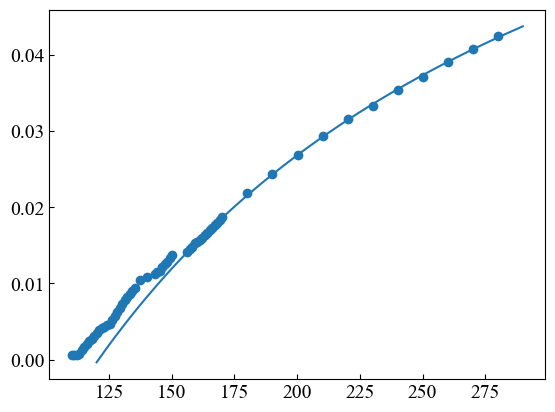

In [68]:
def curie_curve(Temp, eb, C, T0):
    return eb+C/(Temp-T0)

initial_guess = [10.0, 2500, 120]
lower_bounds  = [ 9.0, 2000, 110]
upper_bounds  = [11.0, 3000, 130]
param, cov = curve_fit(f=curie_curve, xdata=Temp[:26], ydata=Epsilon1[:26], p0=initial_guess, bounds=(lower_bounds,upper_bounds)) # 測定がうまくいった26番目までのデータのみでフィットする
print(param) # [  10.17264981 2152.1220814   120.72262464] が出力されるはず
eb, Curie, T0 = param

fit_curve = lambda T: curie_curve(T,*param)
plt.plot(np.linspace(120, 290, 100), 1/fit_curve(np.linspace(120, 290, 100)))
plt.scatter(Temp, 1/(Epsilon1))

## プロット

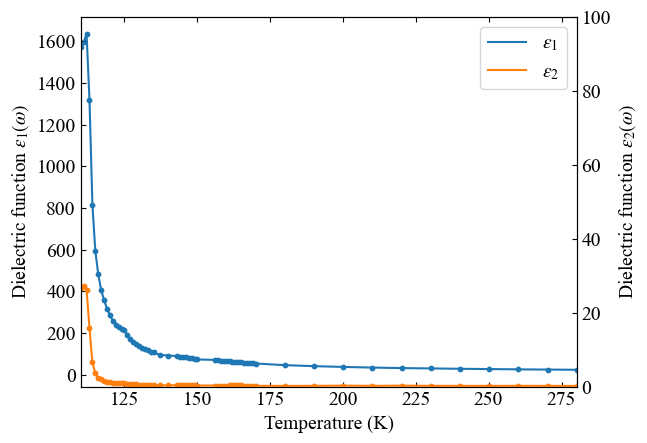

In [27]:
f = plt.figure()
ax1 = f.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

xmin = np.min(Temp)
xmax = np.max(Temp)
ax1.set_xlim(xmin, xmax)
ax1.set_xlabel("Temperature (K)")

ax1.set_ylabel("Dielectric function $\epsilon_1(\omega)$")
l1 = ax1.plot(Temp, Epsilon1, label="$\epsilon_1$", color="tab:blue")
ax1.scatter(Temp, Epsilon1, color="tab:blue", s=10)

ax2 = ax1.twinx()
ax2.set_ylim(top=100)
ax2.set_ylabel("Dielectric function $\epsilon_2(\omega)$")
l2  = ax2.plot(Temp, Epsilon2, label="$\epsilon_2$", color="tab:orange")
ax2.scatter(Temp, Epsilon2, color="tab:orange", s=10)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

plt.show()

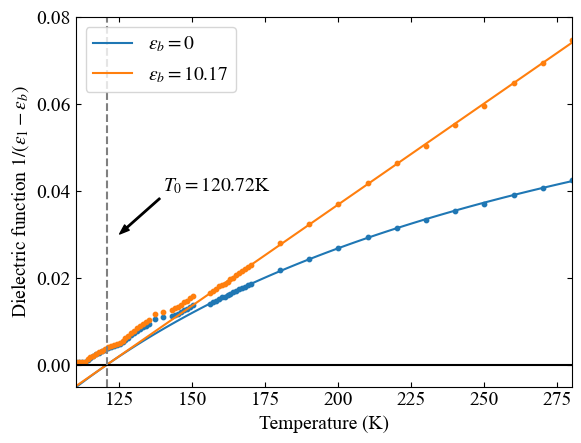

In [88]:
f = plt.figure()
ax1 = f.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

xmin = np.min(Temp)
xmax = np.max(Temp)
ax1.set_xlim(xmin, xmax)
ax1.set_xlabel("Temperature (K)")

ymin = -0.005
ymax = 0.08
ax1.set_ylim(ymin, ymax)
ax1.set_ylabel("Dielectric function $1/(\epsilon_1-\epsilon_b)$")
ax1.set_yticks(np.linspace(0, 0.08, 5))

Temps = np.linspace(110, 300, 100)
ax1.plot(Temps, 1/curie_curve(Temps,*param), label="$\epsilon_b = 0$", color="tab:blue")
ax1.scatter(Temp, 1/Epsilon1, s=10, color = "tab:blue")

ax1.plot(Temps, (Temps-T0)/Curie, label="$\epsilon_b = {:.2f}$".format(eb), color="tab:orange")
ax1.scatter(Temp, 1/(Epsilon1-eb), s=10, color="tab:orange")

ax1.hlines(0,xmin, xmax, color="black")
ax1.vlines(T0,ymin,ymax, color="grey",linestyles="dashed")
ax1.annotate(text="$T_0 = {:.2f} $K".format(T0), xy=(125,0.03), xytext=(140,0.04), arrowprops=dict(color='black', width =1.0,headwidth=5.0,headlength=7.0,shrink=0.01))

ax1.legend()

plt.show()